## Exploratory Data Analysis (EDA) of Hate Speech in Tweets

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
current_directory = os.getcwd()
print(current_directory)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=True)
import seaborn as sns


%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
print("CUDA available: ", torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

cleaned_tweets_df_train = pd.read_csv('./DataSet/cleaned_tweets_train.csv', index_col=0)
cleaned_tweets_df_test = pd.read_csv('./DataSet/cleaned_tweets_test.csv', index_col=0)
cleaned_tweets_df_train

/home/lucy/Documents/MachineLearning/Glacier_git
CUDA available:  True


,label,tweet
id,,
0,0,just heard an add for during your market repo ...
1,1,youre a blight lemon party
2,0,bihday tristen
3,1,youre a waste of everything good jack off
4,0,turkey threw in the towel against spain says s...
...,...,...
44731,0,when you have finally finished your bathesis a...
44732,0,vegas ready just 10 more days to go vegas 10days
44733,0,ja eish - some ppl have this blind spot of not...


In [9]:
## Basic analysis of labels and annotations

print('Label distribution')
print(cleaned_tweets_df_train.label.value_counts())
print('-------------------------\n')

Label distribution
label
0    29720
1    15016
Name: count, dtype: int64
-------------------------



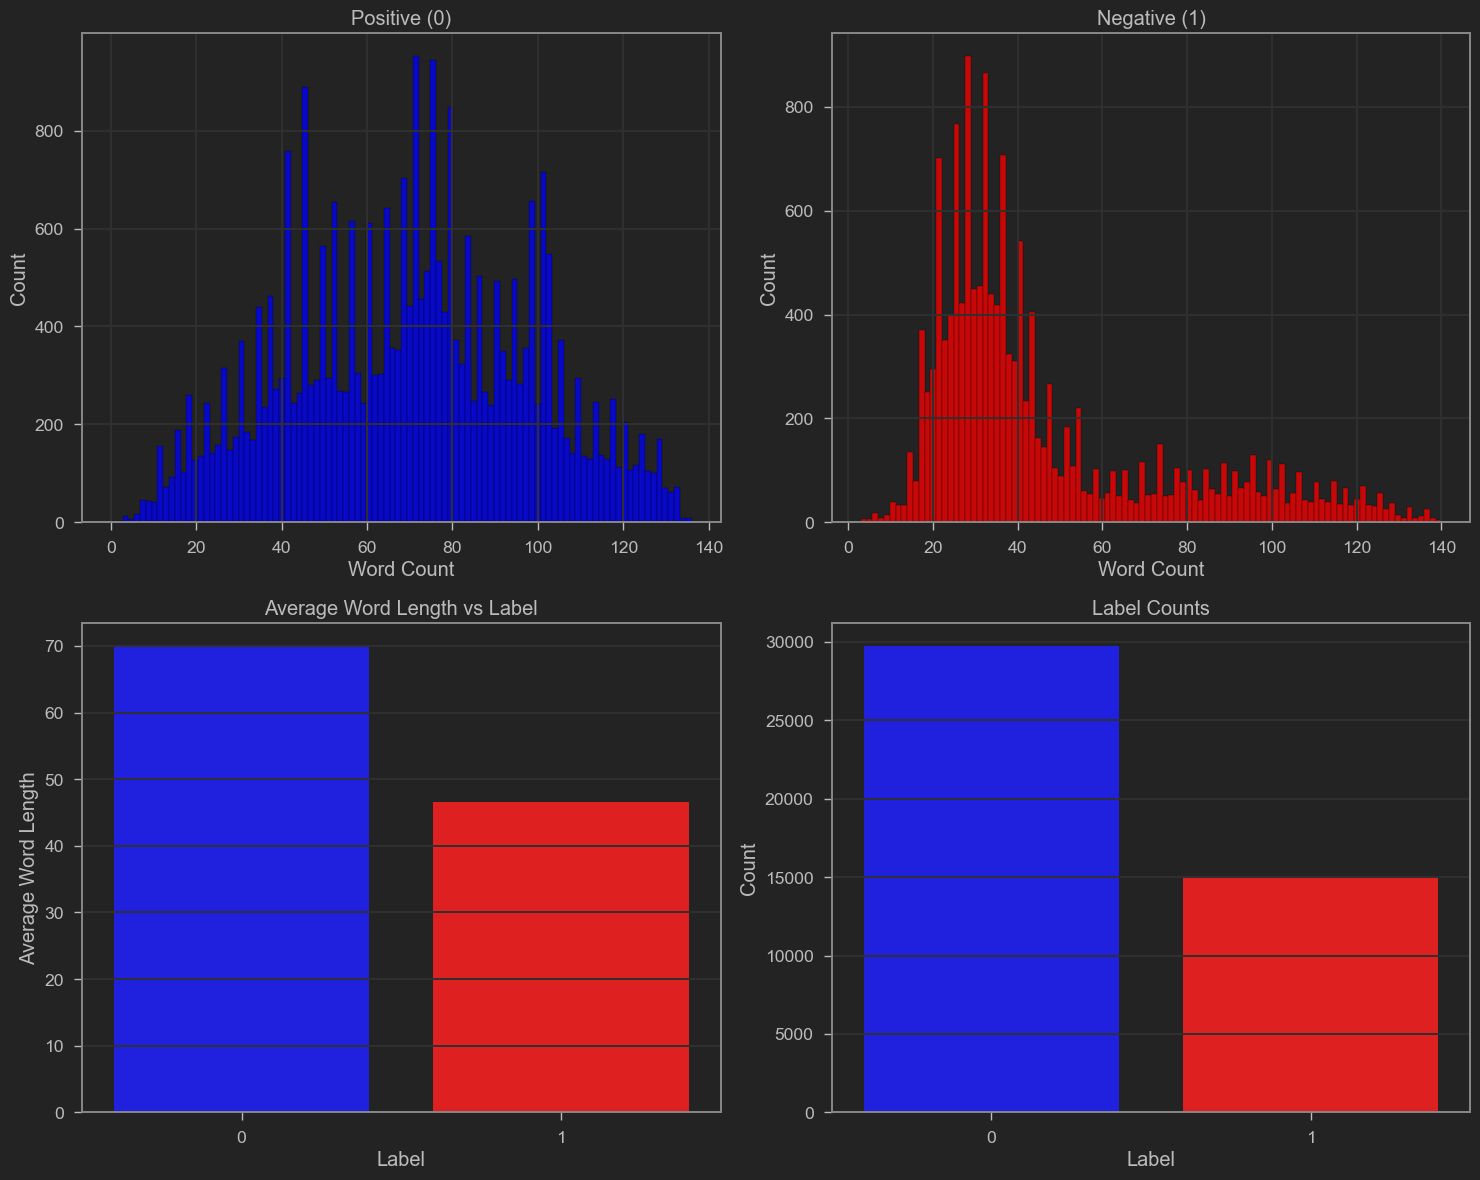

In [10]:
# Ensure the 'tweet' column does not contain any NaN values
cleaned_tweets_df_train['tweet'] = cleaned_tweets_df_train['tweet'].fillna('')
# Convert all entries in the 'tweet' column to strings
cleaned_tweets_df_train['tweet'] = cleaned_tweets_df_train['tweet'].astype(str)
# Calculate the length of each tweet
cleaned_tweets_df_train['length'] = cleaned_tweets_df_train['tweet'].apply(len)
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plotting positive (0) label distribution
positive_length = cleaned_tweets_df_train[cleaned_tweets_df_train['label'] == 0]['length']
sns.histplot(positive_length, bins=100, kde=False, ax=axes[0, 0], color='blue', edgecolor='black')
axes[0, 0].set_title('Positive (0)')
axes[0, 0].set_xlabel('Word Count')
axes[0, 0].set_ylabel('Count')

# Plotting negative (1) label distribution
negative_length = cleaned_tweets_df_train[cleaned_tweets_df_train['label'] == 1]['length']
sns.histplot(negative_length, bins=100, kde=False, ax=axes[0, 1], color='red', edgecolor='black')
axes[0, 1].set_title('Negative (1)')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Count')

# Average Word Length vs Label
avg_word_length = cleaned_tweets_df_train.groupby('label')['length'].mean().reset_index()
sns.barplot(x='label', y='length', data=avg_word_length, ax=axes[1, 0], palette=['blue', 'red'])
axes[1, 0].set_title('Average Word Length vs Label')
axes[1, 0].set_xlabel('Label')
axes[1, 0].set_ylabel('Average Word Length')

# Label Counts
label_counts = cleaned_tweets_df_train['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
sns.barplot(x='label', y='count', data=label_counts, ax=axes[1, 1], palette=['blue', 'red'])
axes[1, 1].set_title('Label Counts')
axes[1, 1].set_xlabel('Label')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Overview
This report provides an analysis of the cleaned tweet data. The visualizations include the distribution of word counts for positive and negative labels, the average word length per label, and the overall label counts.

1. Positive (0) Label Distribution
The histogram in the top-left plot shows the distribution of word counts for tweets labeled as positive (0). The distribution appears to be fairly normal, with the majority of tweets having a word count between 40 and 80. This indicates that positive tweets are generally longer, with a peak around 60 words.

2. Negative (1) Label Distribution
The histogram in the top-right plot displays the distribution of word counts for tweets labeled as negative (1). The distribution shows a peak around 40 words, with most tweets having a word count between 20 and 60. Negative tweets tend to be shorter compared to positive tweets.

3. Average Word Length vs. Label
The bar plot in the bottom-left corner shows the average word length for each label. Tweets with a positive label (0) have a higher average word length compared to tweets with a negative label (1). This suggests that positive tweets are generally longer in terms of word count.

4. Label Counts
The bar plot in the bottom-right corner shows the count of each label in the dataset. There are significantly more tweets labeled as positive (0) compared to negative (1). This imbalance in label distribution should be considered when training models to ensure they are not biased towards the more frequent label.

Conclusion
The visualizations provide valuable insights into the distribution of tweet lengths and the balance of labels in the dataset. Positive tweets are generally longer and more prevalent in the dataset. These factors should be considered when preprocessing the data and training models to ensure accurate and unbiased predictions.

### Featurization in NLP

Featurization is the process of converting text data into numerical representations that machine learning models can interpret. This step is crucial in NLP (Natural Language Processing) because models require numerical input to perform tasks such as classification, clustering, and sentiment analysis. In this context, three different featurization techniques were utilized: Bag of Words (BoW), TF-IDF, and Word Embeddings using GloVe.

1. **Bag of Words (BoW)**: This method converts text into a fixed-size vector by counting the occurrences of each word in the text. Each dimension of the vector represents a specific word from the vocabulary, and the value indicates the word's frequency in the document. BoW is simple and efficient, especially for text classification tasks, but it ignores the semantic meaning and context of words.

2. **TF-IDF (Term Frequency-Inverse Document Frequency)**: TF-IDF improves upon BoW by considering not only the frequency of a word in a document (term frequency) but also how unique or common the word is across all documents (inverse document frequency). This method helps to down-weight common words and highlight more informative words. TF-IDF is useful when distinguishing important words in large corpora and is often preferred for tasks where capturing the importance of terms is crucial.

3. **Word Embeddings (e.g., GloVe)**: Word embeddings represent words in a dense vector space where semantically similar words are closer together. Pre-trained embeddings like GloVe capture the context of words in a corpus by considering word co-occurrence statistics. This method retains semantic relationships and is particularly beneficial for tasks that require understanding the meaning and context of words, such as sentiment analysis and language translation. Unlike BoW and TF-IDF, word embeddings are more effective in generalizing across different contexts and handling large vocabularies.

4. **Sentence Embeddings (e.g., BERT)**: Sentence transformers like BERT provide embeddings that are context-aware and capture the meaning of sentences. BERT embeddings are generated by processing text through deep learning models that consider the surrounding context of each word, resulting in rich, contextual representations. These embeddings are useful for tasks that require understanding the nuanced meaning and context of text, such as named entity recognition and question answering.

5. **Embeddings from GPT**: GPT models generate embeddings that capture the sequential nature of text by predicting the next word in a sentence. GPT embeddings are also context-aware, but they emphasize the generative aspect of language, making them suitable for tasks like text generation, completion, and conversational agents.

### Key Differences Between Sentence Embeddings (BERT) and GPT Embeddings

- **Contextual Awareness**: Both BERT and GPT embeddings are context-aware, meaning they capture the meaning of words based on their context within a sentence. However, BERT embeddings are bidirectional, considering both the left and right context of a word, while GPT embeddings are unidirectional, considering only the left context.
  
- **Training Objectives**: BERT is trained using a masked language model (MLM) objective, where some words in the input are masked and the model learns to predict them. This allows BERT to capture deep contextual relationships. GPT, on the other hand, is trained using a causal language model (CLM) objective, focusing on predicting the next word in a sequence, which is effective for generative tasks.

- **Use Cases**: BERT embeddings are particularly useful for tasks that require a deep understanding of the text context, such as sentiment analysis, question answering, and named entity recognition. GPT embeddings excel in tasks that involve text generation, dialogue systems, and any application where predicting the next word is crucial.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim.downloader as api
import torch
from transformers import BertTokenizer, BertModel, GPT2Tokenizer, GPT2Model
import joblib

In [7]:
import pandas as pd
import numpy as np
import torch
from transformers import GPT2Tokenizer, GPT2Model

# Load the dataset
cleaned_tweets_df_train = pd.read_csv('./DataSet/cleaned_tweets_train.csv', index_col=0)

# Ensure the texts are passed as a list of strings
texts = cleaned_tweets_df_train['tweet'].tolist()
texts = [str(text) for text in texts if text is not None]  # Ensure all are strings and non-null

# Initialize the tokenizer and model
tokenizer_gpt = GPT2Tokenizer.from_pretrained('gpt2')
if tokenizer_gpt.pad_token is None:
    tokenizer_gpt.add_special_tokens({'pad_token': tokenizer_gpt.eos_token})
model_gpt = GPT2Model.from_pretrained('gpt2')

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_gpt.to(device)

# Function to get GPT embeddings
def get_gpt_embeddings(texts, tokenizer, model, device):
    embeddings = []
    for text in texts:
        # Debugging line to check input type and content
        #print(f"Processing text: {text[:30]}... (Type: {type(text)})")
        
        if isinstance(text, str):  # Ensure the input is a string
            inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
            outputs = model(**inputs)
            embeddings.append(outputs.last_hidden_state.mean(dim=1).detach().cpu().numpy())
        else:
            print(f"Skipping invalid input: {text} (Type: {type(text)})")
    return np.vstack(embeddings)

# Get GPT embeddings
X_gpt = get_gpt_embeddings(texts, tokenizer_gpt, model_gpt, device)

# Save GPT embeddings
np.save('./Embeddings/X_gpt.npy', X_gpt)

print("GPT Feature Representation Shape:", X_gpt.shape)


GPT Feature Representation Shape: (42318, 768)


Loaded GPT Feature Representation Shape: (42318, 768)


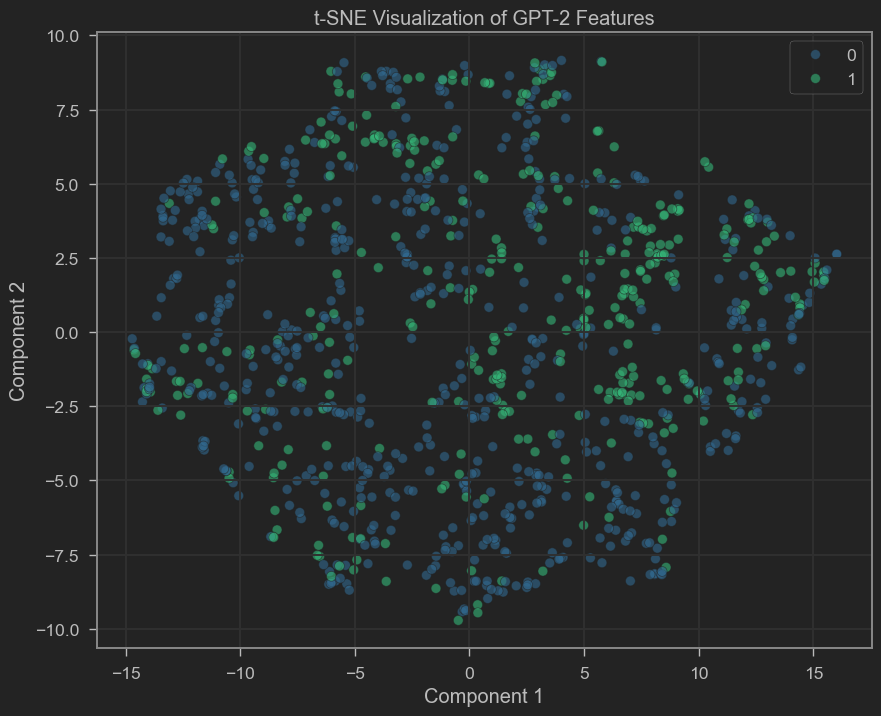

In [10]:
# Load the GPT embeddings
X_gpt_loaded = np.load('./Embeddings/X_gpt.npy')

print("Loaded GPT Feature Representation Shape:", X_gpt_loaded.shape)

# Ensure embeddings and labels are correctly matched
assert X_gpt_loaded.shape[0] == cleaned_tweets_df_train.shape[0], "Mismatch in number of embeddings and labels"

from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
def tsne_reduce(X, n_components=2, perplexity=30, random_state=42):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=random_state, n_iter=300)
    return tsne.fit_transform(X)

# Sample a subset of the embeddings for t-SNE visualization
sample_size = 1000
indices = np.random.choice(X_gpt_loaded.shape[0], sample_size, replace=False)
embeddings_sample = X_gpt_loaded[indices]
labels_sample = cleaned_tweets_df_train['label'].values[indices]

# Apply t-SNE
embeddings_tsne = tsne_reduce(embeddings_sample)

# Plot the embeddings
def plot_embeddings(embeddings, labels, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], hue=labels, palette="viridis", s=50, alpha=0.6, edgecolor='k')
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(loc='best')
    plt.show()

# Plot the t-SNE results
plot_embeddings(embeddings_tsne, labels_sample, title="t-SNE Visualization of GPT-2 Features")

Loaded GPT Feature Representation Shape: (42318, 768)


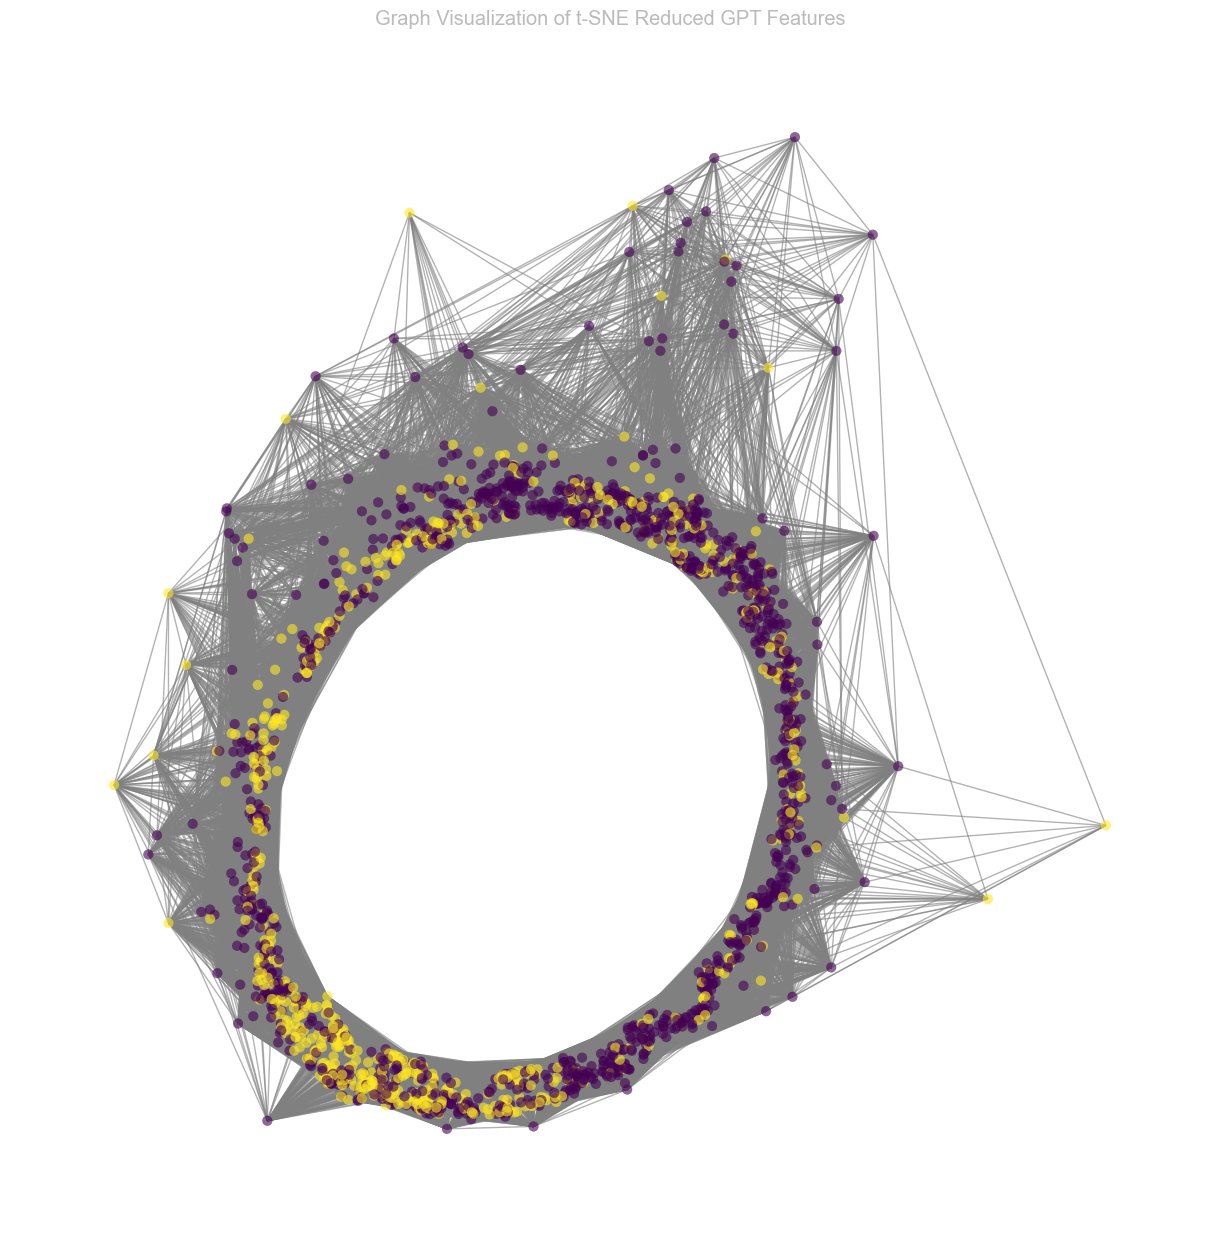

In [54]:
import pandas as pd
import numpy as np
import torch
from transformers import GPT2Tokenizer, GPT2Model
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cleaned_tweets_df_train = pd.read_csv('./DataSet/cleaned_tweets_train.csv', index_col=0)

# Load the GPT embeddings
X_gpt_loaded = np.load('./Embeddings/X_gpt.npy')

print("Loaded GPT Feature Representation Shape:", X_gpt_loaded.shape)

# Ensure embeddings and labels are correctly matched
assert X_gpt_loaded.shape[0] == cleaned_tweets_df_train.shape[0], "Mismatch in number of embeddings and labels"

# Select a subset of data for visualization
sample_size = 2000
indices = np.random.choice(X_gpt_loaded.shape[0], sample_size, replace=False)
embeddings_sample = X_gpt_loaded[indices]
labels_sample = cleaned_tweets_df_train['label'].values[indices]

# Reduce dimensions using t-SNE
def tsne_reduce(X, n_components=3, perplexity=20, random_state=42):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=random_state, n_iter=300)
    return tsne.fit_transform(X)

# Apply t-SNE
embeddings_tsne = tsne_reduce(embeddings_sample)

# Create a similarity matrix using cosine similarity
def create_similarity_matrix(X):
    return cosine_similarity(X)

# Build a graph from the similarity matrix
def build_graph(similarity_matrix, threshold=0.8):
    G = nx.Graph()
    num_nodes = similarity_matrix.shape[0]
    
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if similarity_matrix[i, j] > threshold:
                G.add_edge(i, j, weight=similarity_matrix[i, j])
    
    return G

# Plot the graph using NetworkX
def plot_graph(G, labels, title):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)
    node_labels = [labels[node] for node in G.nodes()]  # Ensure labels match the graph nodes
    nx.draw(G, pos, node_color=node_labels, 
            node_size=50, cmap=plt.cm.viridis, with_labels=False, 
            edge_color="gray", alpha=0.6)
    plt.title(title)
    plt.show()

# Compute similarity matrix for t-SNE embeddings
similarity_matrix_tsne = create_similarity_matrix(embeddings_tsne)

# Build graph for t-SNE embeddings
G_tsne = build_graph(similarity_matrix_tsne)

# Plot the graph
plot_graph(G_tsne, labels_sample, "Graph Visualization of t-SNE Reduced GPT Features")


The model's embeddings capture semantic similarities well, grouping similar tweets together while also revealing clear distinctions between different classes. The ability to form these clusters indicates that GPT-2 embeddings are effective in capturing the underlying semantics of the tweets, which is further refined by the t-SNE algorithm.

### General TSN

Loaded GPT Feature Representation Shape: (42318, 768)


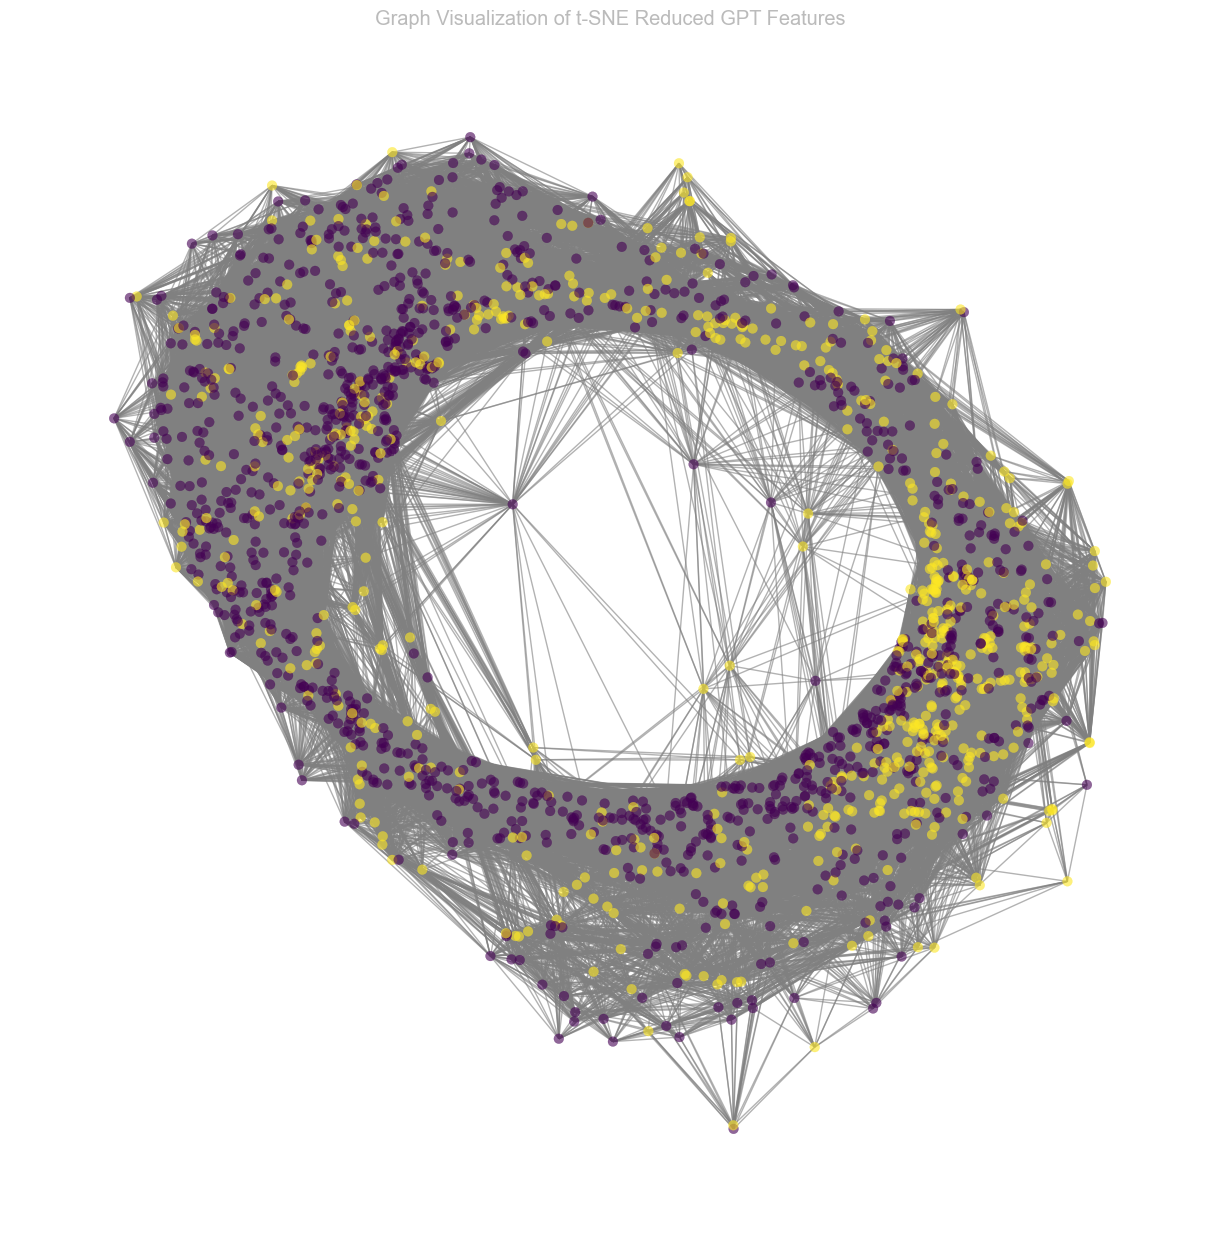

In [64]:
import pandas as pd
import numpy as np
import torch
from transformers import GPT2Tokenizer, GPT2Model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cleaned_tweets_df_train = pd.read_csv('./DataSet/cleaned_tweets_train.csv', index_col=0)

# Load the GPT embeddings
X_gpt_loaded = np.load('./Embeddings/X_gpt.npy')

print("Loaded GPT Feature Representation Shape:", X_gpt_loaded.shape)

# Ensure embeddings and labels are correctly matched
assert X_gpt_loaded.shape[0] == cleaned_tweets_df_train.shape[0], "Mismatch in number of embeddings and labels"

# Select a subset of data for visualization
sample_size = 2000
indices = np.random.choice(X_gpt_loaded.shape[0], sample_size, replace=False)
embeddings_sample = X_gpt_loaded[indices]
labels_sample = cleaned_tweets_df_train['label'].values[indices]

# Reduce dimensions using PCA first
def pca_reduce(X, n_components=50):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)

# Apply PCA
embeddings_pca = pca_reduce(embeddings_sample)

# Reduce dimensions using t-SNE on PCA-reduced data
def tsne_reduce(X, n_components=5, perplexity=5, random_state=42):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=random_state, method='exact')
    return tsne.fit_transform(X)

# Apply t-SNE
embeddings_tsne = tsne_reduce(embeddings_pca)

# Create a similarity matrix using cosine similarity
def create_similarity_matrix(X):
    return cosine_similarity(X)

# Build a graph from the similarity matrix
def build_graph(similarity_matrix, threshold=0.8):
    G = nx.Graph()
    num_nodes = similarity_matrix.shape[0]
    
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if similarity_matrix[i, j] > threshold:
                G.add_edge(i, j, weight=similarity_matrix[i, j])
    
    return G

# Plot the graph using NetworkX
def plot_graph(G, labels, title):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)
    node_labels = [labels[node] for node in G.nodes()]  # Ensure labels match the graph nodes
    nx.draw(G, pos, node_color=node_labels, 
            node_size=50, cmap=plt.cm.viridis, with_labels=False, 
            edge_color="gray", alpha=0.6)
    plt.title(title)
    plt.show()

# Compute similarity matrix for t-SNE embeddings
similarity_matrix_tsne = create_similarity_matrix(embeddings_tsne)

# Build graph for t-SNE embeddings
G_tsne = build_graph(similarity_matrix_tsne)

# Plot the graph
plot_graph(G_tsne, labels_sample, "Graph Visualization of t-SNE Reduced GPT Features")
